In [215]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [216]:
df = pd.read_csv('DobleRendija.txt', header=None, names=['X', 'V'], delimiter='\t')
print(df)

       X    V
0     40  119
1     42  120
2     44  122
3     46  124
4     48  125
..   ...  ...
434  908  114
435  910  107
436  912  198
437  914  195
438  916  194

[439 rows x 2 columns]


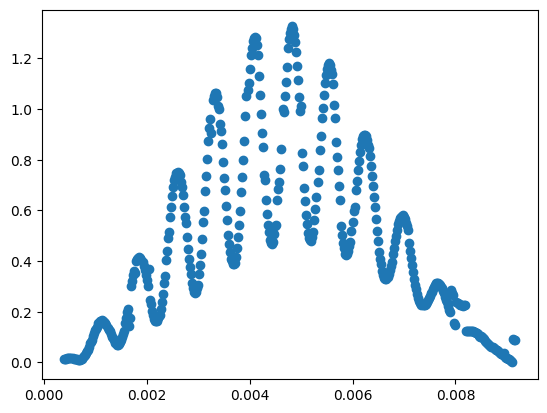

In [217]:
X = df['X'].values.astype(float)
X = X*pow(10,-5)
V = df['V'].values.astype(float)*pow(10,-3)
minV = np.min(V)
V = V-minV
plt.scatter(X,V)

[ 14  52  89 127 165 202 239 274 312 349 380 433]
[0.00068, 0.00144, 0.00218, 0.0029400000000000003, 0.0037, 0.00444, 0.005180000000000001, 0.005880000000000001, 0.006640000000000001, 0.00738, 0.008, 0.00906]
[0.010544823742844957, 0.0717024270939387, 0.16477286919204512, 0.2787256803375548, 0.39107204826719577, 0.4744563296664919, 0.48610673363664847, 0.42931509107205323, 0.33185666342417675, 0.2263732454840468, 0.18403234385710318, 0.010472211930116078]


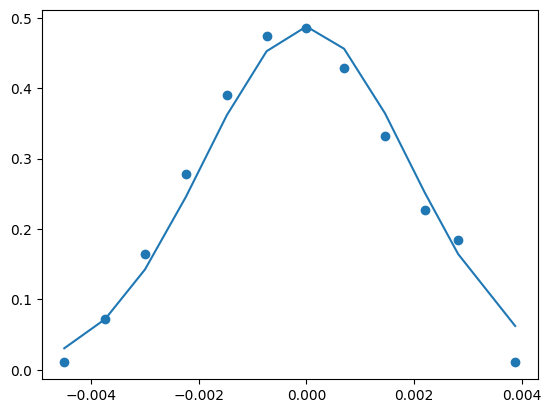

In [219]:
from scipy.signal import argrelextrema
from scipy.ndimage import gaussian_filter1d
V = gaussian_filter1d(V, 1)
minimos_locales_indices = argrelextrema(V, np.less, order=5)[0]
x_minimos = []
print(minimos_locales_indices)
minimos = []
for i in minimos_locales_indices:
    x_minimos.append(X[i])
    minimos.append(V[i])
print(x_minimos)
print(minimos)
minimos = np.array(minimos)
x_minimos = np.array(x_minimos)
max_volt_ind = np.max(minimos)
max_volt_ind = np.where(minimos==max_volt_ind)
x_minimos = x_minimos - x_minimos[max_volt_ind]
def Gauss(x, A, B): 
    y = A*np.exp(-1*B*x**2) 
    return y 
parameters, covariance = curve_fit(Gauss, x_minimos, minimos) 
plt.scatter(x_minimos,minimos)
plt.plot(x_minimos,Gauss(x_minimos,parameters[0],parameters[1]))

In [220]:
gaussian = Gauss(x_minimos,parameters[0],parameters[1])

In [221]:
I0 = np.max(V)
d = 0.406e-3 
a = 0.1e-3  
x0 = np.where(V==I0)[0]
x0 = X[x0]
x_data = (X-x0)

Optimal parameters:
A = 0.8664347664496146 ± 0.008927207696652227
C = 195.2176141507906 ± 2.202896432455319
D = 1351.2612741542846 ± 1.8194849429012254


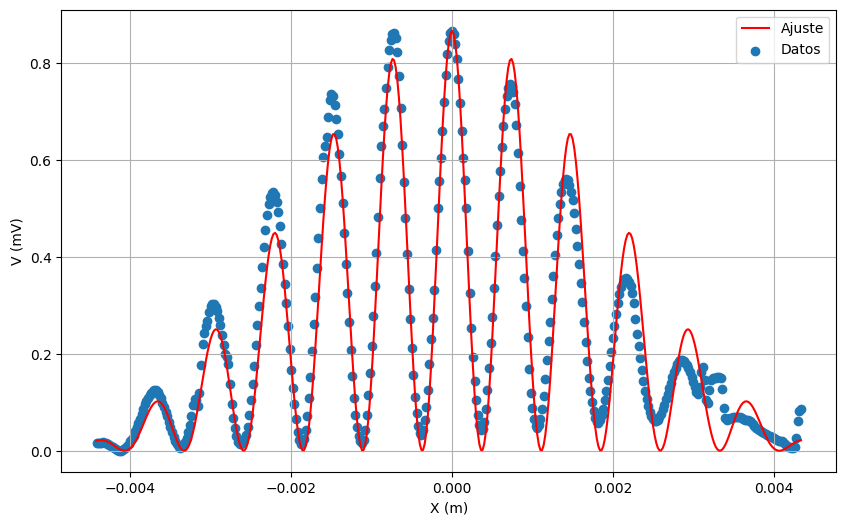

a:  0.00013079580148102972
(439,)
lambda:  5.122488584598606e-07
d:  0.000692182045166549


In [222]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
gaussian = Gauss(x_data,parameters[0],parameters[1])
y_data = V-gaussian
I0 = np.max(y_data)
y_data = y_data + np.abs(np.min(y_data))
lamb = 400*pow(10,-9)

#Definir función para el ajuste
def model_function(x, A, C, D):
    term1 = np.cos(D*np.pi*x)**2
    term2 = (np.sinc(C*x))**2
    return A * term1 * term2
guessC = a/lamb
guessD = d/lamb

initial_guesses = [I0,guessC,guessD]

# Realizar ajuste
popt, pcov = curve_fit(model_function, x_data, y_data, initial_guesses)

A_opt, C_opt, D_opt = popt
perr = np.sqrt(np.diag(pcov))

print(f"Optimal parameters:")
print(f"A = {A_opt} ± {perr[0]}")
print(f"C = {C_opt} ± {perr[1]}")
print(f"D = {D_opt} ± {perr[2]}")

lambREAL = 670*pow(10,-9)
lambdapred = a/C_opt
# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
y_fit = model_function(x_data, *popt)

plt.plot(x_data, y_fit, color = 'r', label = 'Ajuste')
plt.scatter(x_data,y_data, label = 'Datos')
plt.xlabel('X (m)')
plt.ylabel('V (mV)')
plt.legend()
plt.grid()
plt.show()
print('a: ', C_opt*lambREAL)
print(x_data.shape)
print('lambda: ', a/C_opt)
print('d: ', D_opt*lambdapred)
